### show an example of image and label

In [235]:
import idx2numpy
from scipy import ndimage
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from pylab import rcParams
from bokeh.plotting import figure, show, output_file
rcParams['figure.figsize'] = 15, 10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from PIL import Image
from StringIO import StringIO
import base64

In [236]:
images = idx2numpy.convert_from_file(open('train-images.idx3-ubyte', 'rb'))
labels = idx2numpy.convert_from_file(open('train-labels.idx1-ubyte', 'rb'))

In [237]:
def Show(n):
    plt.imshow(images[n], cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()
    print "NUMBER"
    print labels[n]

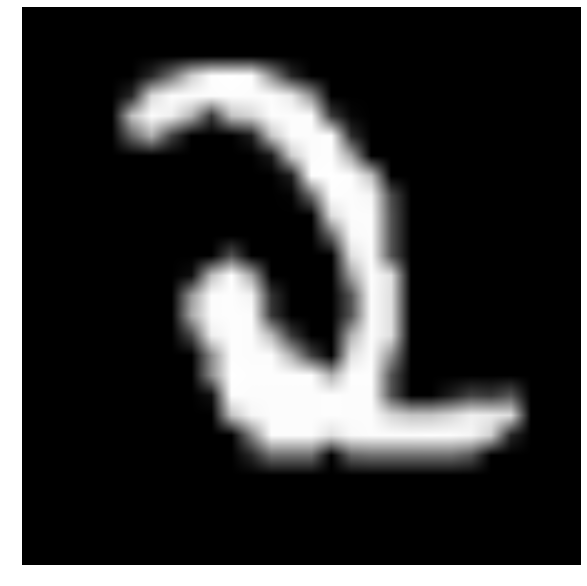

NUMBER
2


In [238]:
Show(400)

----------

### create a train test split

In [239]:
from sklearn.decomposition import RandomizedPCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [240]:
data = []
for im in images:
    b=[]
    for row in im:
        for d in row:
            b.append(d)
    data.append(b)

In [241]:
pca = RandomizedPCA(n_components=10)
std_scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

------

### training the classifier (K-Nearest Neighbors classifier)

In [242]:
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train, y_train)
print "done"
print "="*20
print clf

print "Confusion Matrix"
print "="*40
print confusion_matrix(y_test, clf.predict(X_test))

done
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=13, p=2, weights='uniform')
Confusion Matrix
[[596   0   2   1   0   3   3   0   3   2]
 [  0 660   7   1   1   0   0   0   0   1]
 [  5   1 598   2   1   1   3   7  12   2]
 [  1   2  10 546   2  15   3   5  29   7]
 [  0   0   1   0 505   3   6   5   2  44]
 [  7   2   1  11   1 495   3   1   3  10]
 [  7   1   2   0   1   6 593   0   1   0]
 [  0   7   3   1   4   2   0 579   1  23]
 [  8   5   2  18   2  10   3   2 485  10]
 [  2   3   0  10  26   4   5  10   5 527]]


### prediction

In [261]:
def transform(f):
        STANDARD_SIZE = (28, 28)
        img = Image.open(f).convert('L')
        img = img.getdata()
        img = img.resize(STANDARD_SIZE)
        return img

def predict(img):
        x = pca.transform([img])
        x = std_scaler.transform(x)
        results = {"label": clf.predict(x)[0]}
        probs = {"prob_" + str(i) : prob for i, prob in enumerate(clf.predict_proba(x)[0])}
        results['probs'] = probs
        return results

In [264]:
a = transform("test_2.png")

In [265]:
predict(a)

{'label': 2,
 'probs': {'prob_0': 0.0,
  'prob_1': 0.15384615384615385,
  'prob_2': 0.38461538461538464,
  'prob_3': 0.15384615384615385,
  'prob_4': 0.076923076923076927,
  'prob_5': 0.0,
  'prob_6': 0.0,
  'prob_7': 0.0,
  'prob_8': 0.076923076923076927,
  'prob_9': 0.15384615384615385}}